# Project: Wrangling and Analyze Data

In [ ]:
import pandas as pd 
import requests
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS 
import seaborn as sns
from PIL import Image
import io
import matplotlib.image  as mpimg
from IPython.display import display

## Data Gathering

In [2]:
twi_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

ConnectionError: HTTPSConnectionPool(host='d17h27t6h515a5.cloudfront.net', port=443): Max retries exceeded with url: /topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0xa1eba580>: Failed to establish a new connection: [Errno 7] No address associated with hostname'))

In [ ]:
with open ('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [5]:
df = pd.read_csv('image-predictions.tsv',sep = '\t')

In [ ]:
df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [3]:
make = []
with open ('tweet-json.txt','r') as file:
    for each in file:
        tweet = json.loads(each)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favourites_count = tweet['favorite_count']
            
        make.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favourites_count':favourites_count})
tweet_info = pd.DataFrame(make)

In [6]:
master = pd.merge(twi_arc,df, on = 'tweet_id')
master = pd.merge(master, tweet_info,on = 'tweet_id')

## Assessing Data
In this section, i will detect and document quality and tidiness issues using both visual and programmatic assessement.

### Visual Assessment 

In [ ]:
master_df.sample(25)

### Programmatic Assessment 

In [ ]:
master_df.info()

In [ ]:
master_df.name.value_counts()

### Quality issues
1. Remove all retweets in the dataset.

2. Change all __None__ values to __NaN__ so they do not skew the analysis.

3. There are missing values for the name column.

4. Replace all occurences of 'a','an' and 'the' with np.nan.

5. Change the __timestamp__ column to a datetime object. 

6. Eliminate all tweets that are not dog related.

7. Convert the values in columns text,name, p1,p2,p3 to lowercase.

8. Replace all occurrences of '-' with '_'


### Tidiness issues
1.Merge the ratings_numerator and ratings_denominator to a single column, __ratings__.

2.Merge the different status columns (doggo,floofer....) into a single column status.

## Cleaning Data
In this section, I'll clean **all** of the issues documented while assessing. 



In [7]:
#make copy of original dataset
master_df = master.copy()

In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #1:

##### Define
Filter the dataset to remove retweets. 

##### Code

In [8]:
master_df = master_df[master_df.retweeted_status_id.isnull()]

##### Test

In [9]:
master_df.retweeted_status_id.count()

0

All retweets have been removed form the dataset.

### Issue #2:

##### Define:
Replace all __None__ values with __np.nan__ so the analysis is not skewed.

##### Code:

In [10]:
for each in master_df.columns:
    master_df[each]. replace ('None',np.nan,inplace = True)

##### Test

In [11]:
for each in master_df.columns:
    if 'None' in master_df[each].values:
        print('True')

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_27129/1510652711.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'None' in master_df[each].values:


### Issue #3:

#### Define: 
Missing values in the __name__ column. Using regular expression, i will extract the names from the text.

#### Code

In [12]:
a = master_df.text.str.lower().str.extract('this\sis\s(\w*)\.|meet\s(\w*)\.|named\s(\w*)\.')

The code above is my attempt to extract the names from the __text__ column. Apparently, each _capture group_ creates a column, and so , rather than have the names returned as a series, it is returned as a dataframe with three columns. This is tasking. because now i have to think of a way to combine all the columns returned while maintaining their index position. One way would be to slice the non_empty values of each column, store them in variables and then, concatenate them using __pd.concat()__.

In [13]:
b = a[~a[0].isnull()][0]

c = a[~a[1].isnull()][1]

d = a[~a[2].isnull()][2]

Here, all the sliced non_empty values in each column is stored in variables.

In [14]:
name = pd.concat([b,c,d], axis = 0)

Concatenating the variables results in a series in which the original index of each value is preserved. 

In [15]:
master_df['name1'] = name

The next action would be to replace the __name__ column in __master_df__ with the extracted names. This will not yield the optimum result. Creating a new column for the extract would enable comparison with the __name__ column, if there are more names in the extract, then it will serve as the primary column and a quick check to see if there are some names in the the __name__ column that aren't in the new column will help me add them to the new column and vice versa when there are more names in the __names__ column.

In [18]:
master_df.name.value_counts().head(25)

a          55
Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Sadie       8
Winston     8
the         7
Toby        7
Daisy       7
Lola        7
Stanley     6
Bella       6
an          6
Koda        6
Jax         6
Bo          6
Scout       5
Buddy       5
Rusty       5
Oscar       5
Leo         5
Louis       5
Name: name, dtype: int64

### Issue #4

##### Define: 
Replace all occurences of 'a','an' and 'the' with np.nan.

The name 'a' must have been extracted wrongly. 

In [19]:
for i in ['a','an','the']:
    master_df.name.replace(i,np.nan,inplace = True)

##### Test

In [20]:
for i in ['a','an','the']:
    if i in master_df.name.values:
        print(True)

All occurences of 'a','an', and 'the' is replaced. 

### Issue #3 contd.

In [21]:
master_df[['name','name1']].count()

name     1380
name1    1219
dtype: int64

This shows clearly that there are more names in the __name__ column than in our extracted names column. According to what was said previously, I'll check if there are names in our extracted name column that do not appear in the __name__ column.

In [22]:
g = master_df[master_df.name.isnull()][['name','name1']]

First, i have used a mask to filter out the empty values in the __name__column__. And then I've also taken out the corresponding __name1__ column.

In [25]:
f = g[~g.name1.isnull()]['name1']

From __g__, i have extracted in __f__ the non_null values of __name1__. These are the names in the names extracted that are not in the __name__ column.

In [27]:
i = master_df.name[~master_df.name.isnull()]

Stored in __i__ is the __name__ column with null values removed so as to avoid duplicate index values when i concatenate with __f__.

In [29]:
master_df['name'] = pd.concat([i,f],axis = 0)

##### Test

In [30]:
master_df[['name','name1']]

,name,name1
0,Phineas,phineas
1,Tilly,tilly
2,Archie,archie
3,Darla,darla
4,Franklin,franklin
...,...,...
2068,NaN,NaN
2069,NaN,NaN
2070,NaN,NaN
2071,NaN,NaN


The result of the concatenation replaces the __name__ column and to confirm that the original index position of each value is returned, i compare it with __name1__. 

### Issue #5:

#### Define:
Convert the timestamp column to a datetime object.

#### Code:

In [31]:
master_df.timestamp = pd.to_datetime(master_df.timestamp)

#### Test

In [33]:
master_df.timestamp.dtype

datetime64[ns, UTC]

### Issue #6:

#### Define:
Eliminate all tweets that are not dog related.

#### Code:

In [34]:



master_df = master_df[master_df.iloc[:,np.r_[21,24,27]].any(True)]
         
         
         
         
         
         

With the code above, all rows with pictures in which no dog was identified by the image prediction extension are removed from the dataset. That is, p1_dog, p2_dog and p3_dog all returned False in that row.

##### Test

In [42]:
master_df[~master_df.iloc[:,np.r_[21,24,27]].any(True)]
 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourites_count,name1


### Issue #7

##### Define:
convert the values in columns p1, p2, p3 to lowercase.

##### Code:

In [43]:
master_df[['name','p1','p2','p3']] = master_df[['name','p1','p2','p3']].apply(lambda x : x.str.lower())

##### Test

In [45]:
master_df[['name','p1','p2','p3']].sample(2)

,name,p1,p2,p3
1095,kathmandu,pug,llama,french_bulldog
1123,NaN,golden_retriever,labrador_retriever,tibetan_mastiff


### Issue #8

##### Define:
Replace all occurences of '-' with '_'.

##### Code

In [46]:
master_df[['p1','p2','p3']] = master_df[['p1','p2','p3']].apply(lambda x : x.replace('-','_'))



##### Test:

In [47]:
master_df[['p1','p2','p3']].sample(2)

,p1,p2,p3
1388,toy_poodle,teddy,miniature_poodle
300,american_staffordshire_terrier,staffordshire_bullterrier,bull_mastiff


### Tidiness

### Issue #1:

##### Define:
Extract the ratings into a single column.

##### Code:

In [48]:
master_df['ratings'] = master_df.text.str.extract('(\d{1,2}\/\d{2,3})')
                                                 
                                                

The values in the  __ratings__ column are in string format. This is to enable me perform a value_count on the column to determine the count of each unique rating. 

In [49]:
master_df['decimal_ratings'] = master_df.rating_numerator/master_df.rating_denominator



The __decimal_ratings__ column will enable me perfrom comparison analysis with other numerical columns as you will see as we progress. 

##### Test:

In [50]:
master_df.ratings.value_counts()

12/10     423
10/10     360
11/10     356
13/10     229
9/10      133
8/10       68
7/10       31
14/10      23
6/10       16
5/10       14
4/10        6
3/10        5
2/10        2
45/50       1
44/120      1
26/10       1
7/11        1
21/110      1
43/130      1
44/40       1
60/50       1
80/80       1
27/10       1
99/90       1
50/50       1
4/20        1
9/11        1
0/10        1
65/150      1
84/70       1
75/10       1
88/80       1
Name: ratings, dtype: int64

### Issue #2:

#### Define
Merge the different stages columns (doggo,floofer....) into a single column __stage__.

#### Code

In [51]:
r =  ['doggo','floofer','puppo','pupper']
for each in range(len(r)):
    master_df[r[each]].replace(np.nan,'',inplace = True)

In [52]:
master_df['stage'] = (master_df['doggo'] + master_df.floofer+ master_df.puppo + master_df.pupper)


In [53]:
master_df.stage.replace('',np.nan,inplace= True)

#### Test

In [55]:
master_df.stage.value_counts()

pupper          168
doggo            54
puppo            21
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

##### Extract the relevant columns.

In [56]:
master_df = master_df.iloc[:,np.r_[0,3,5,12,17,19:28,28:30,31:34]]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
master_df.to_csv('twitter_archive_master.csv',index = False)

In [ ]:
master_df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, I analyze and visualize the wrangled data.

In [59]:
master_df.timestamp.describe(datetime_is_numeric = True)

count                                   1686
mean     2016-06-05 01:41:46.580664064+00:00
min                2015-11-15 22:32:08+00:00
25%                2015-12-17 07:03:01+00:00
50%                2016-03-25 09:19:50+00:00
75%      2016-10-31 19:45:06.249999872+00:00
max                2017-08-01 00:17:27+00:00
Name: timestamp, dtype: object

The code above provides me with the information that the tweets in the dataset were between 2015 - 2017.

In [60]:
new = master_df.groupby(master_df.timestamp.dt.year)[['retweet_count','favourites_count']].sum()
new


,retweet_count,favourites_count
timestamp,,
2015,574525,1345911
2016,2258619,6494513
2017,1916517,7726599


This essentially groups the data set by the years and then returns the sum of retweets and likes on every post in that year. This is to give us a picture of how heavy the engagement is and how much of a buzz __WeRateloveDogs__ generates on the social media platform.

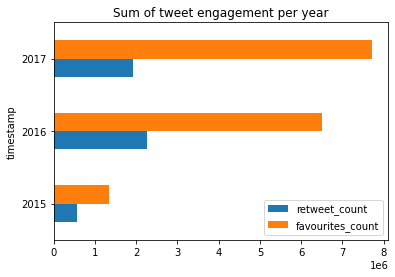

In [61]:
new.plot(kind = 'barh',title = 'Sum of tweet engagement per year');

The visualization shows positive growth. There is a sharp increase between 2015 and 2016, this is misleading considering the fact that the tweets from 2015 were from the 11th month and so there's just tweets gathered in two months in 2015 in the dataset. The focus would be on 2016 to 2017, and although there was a fall in the total number of retweets, the likes increased by a generous amount. 

In [62]:
avg = master_df.groupby(master_df.timestamp.dt.year)[['retweet_count','favourites_count']].mean()
avg.columns = ['retweet_count_avg', 'favourites_count_avg']
avg

,retweet_count_avg,favourites_count_avg
timestamp,,
2015,1115.582524,2613.419417
2016,2657.198824,7640.603529
2017,5970.457944,24070.401869


This code follows the pattern of the previous one above, but here the average number of retweets and likes is returned. The columns are renamed to reflect the changes. 

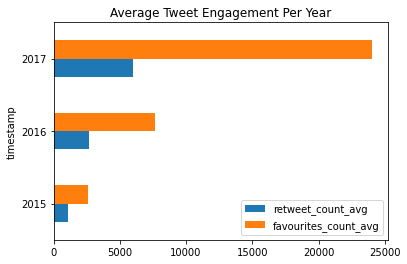

In [63]:
avg.plot(kind = 'barh',title = 'Average Tweet Engagement Per Year');



This paints a clearer picture than the sum, and the focus will remain on 2016 - 2017. The spike in volume is huge and with this we can confirm that whatever strategy __WeRateDogs__ is using to push their content, is working effectively. The average retweet each post gets more than doubled between 2016 - 2017 while the average number of likes per post more than tripled. __Wow__! 

In [64]:
activity = master_df.groupby(master_df.timestamp.dt.year)['tweet_id'].count()
activity

timestamp
2015    515
2016    850
2017    321
Name: tweet_id, dtype: int64

This returns the total number of tweets per year. 

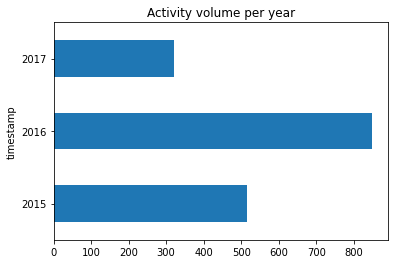

In [66]:

activity.plot(kind = 'barh',title = 'Activity volume per year');


Here's where things get even more mind boggling, the number of tweets in 2017 where less than half of what was generated in 2016, and yet the engagement more than doubled!.

In [80]:

activity_compare = master_df[master_df.timestamp.dt.month <= 8]
activity_compare = activity_compare.groupby(activity_compare.timestamp.dt.year)['tweet_id'].count()
activity

timestamp
2016    636
2017    321
Name: tweet_id, dtype: int64

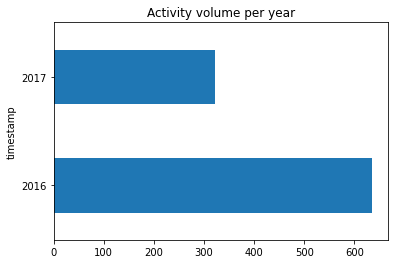

In [81]:

activity_compare.plot(kind = 'barh',title = 'Activity volume per year');


For a more fair comparism, i have extracted tweets from the first 8 months because the tweets from 2017 end in the 8th month. And we can see that the number of tweets fell to less than half of what it was in 2016. Definitely an issue to consider. 

### I mean, do you guys even read the dictionary?

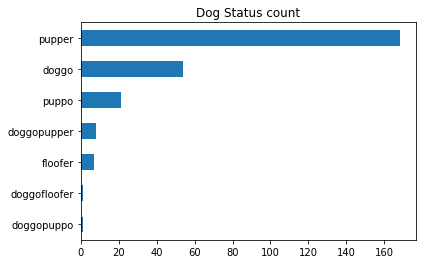

In [68]:
master_df.stage.value_counts().sort_values(ascending = True).plot(kind = 'barh', title = 'Dog Status count');

The dog_stage of many of the dogs were not indicated and so this does not truly represent the entire dataset. But for the ones indicated, the _puppers_ are in the majority, followed ,not closely, by the _doggos_. The community really needs to read the dogtionary and know their dog's status. 

### Names

In [69]:
top_names = master_df.name.value_counts()[master_df.name.value_counts()>=5].sort_values(ascending = True)



This extracts the names that have appeared 5 times or more in the dataset. 

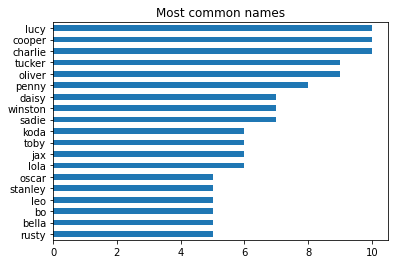

In [70]:
top_names.plot(kind = 'barh',title = 'Most common names');

In [71]:
top_names = master_df.name.value_counts()[master_df.name.value_counts() == 1].sort_values(ascending = False).sample(20)



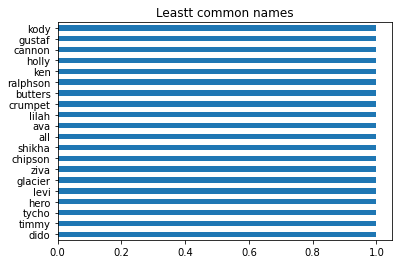

In [72]:
top_names.plot(kind = 'barh',title = 'Least common names');

The previous two codes randomly generates names that appear the least number of times and visualizes them, respectively. Feel free to run them as many times as you like. 

### Higher rating, more likes?

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


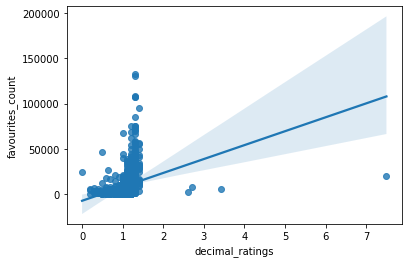

In [73]:
sns.regplot(x = master_df.decimal_ratings, y = master_df.favourites_count);

In [74]:
master_df.decimal_ratings.corr(master_df.favourites_count)

0.3068500870558139

### What are they saying?

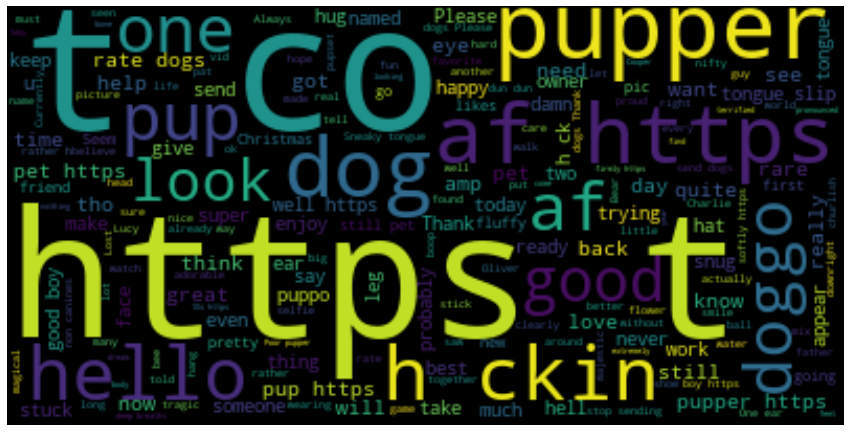

In [94]:
text = ''.join(i for i in master_df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

Some of the words that frequently appear in the text column. 

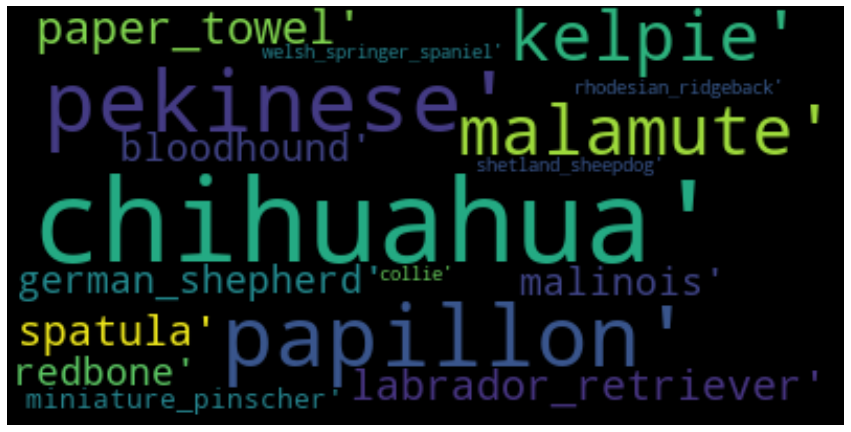

In [75]:
text = master_df[['p1','p2','p3']].values
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(str(text))
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Insights:
1. There has been explosive,positive growth, with the average retweet for each post more than doubling between 2016 - 2017 while the average number of likes per post more than tripled. We can confirm that whatever strategy __WeRateDogs__ is using yo 

2. The number of tweets fell to less than half of what it was in 2016. This is dfinitely an issue to consider.

3. The dog_stage of many of the dogs were not indicated and so this indicates that community really needs to read the dogtionary and know their dog's stage. 

4. The relationship between the rating and number of likes is positive as it should be. 